## Emotion Detection

In [2]:
import matplotlib.pyplot as plt  
from glob import glob     
import cv2  
import random 
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D 
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model 

from IPython.display import SVG, Image 
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.15.0


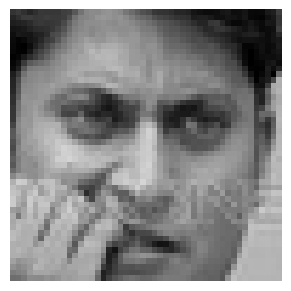

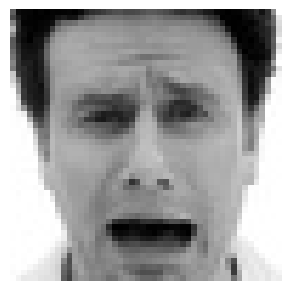

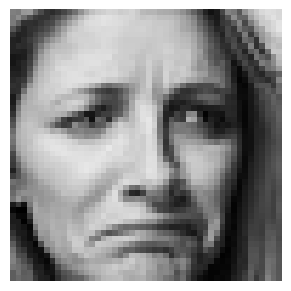

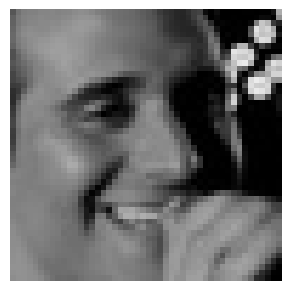

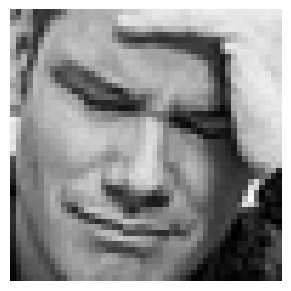

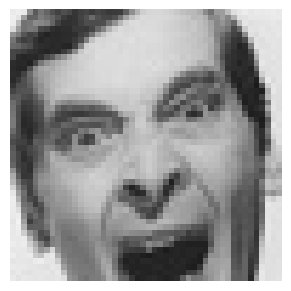

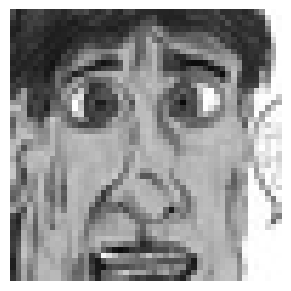

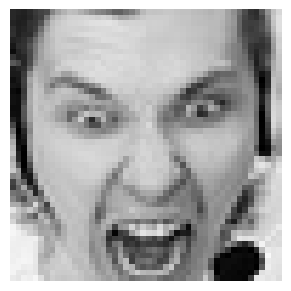

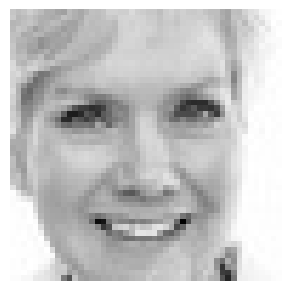

In [3]:
images=glob("/kaggle/input/fer2013/train/**/**")
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

## Preparing data for training

In [4]:
img_size=48 
batch_size=64  
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory("/kaggle/input/fer2013/train/", target_size=(img_size,img_size), color_mode="grayscale", batch_size=batch_size, class_mode="categorical",shuffle=True)     
datagen_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_train.flow_from_directory("/kaggle/input/fer2013/test/", target_size=(img_size,img_size), color_mode="grayscale", batch_size=batch_size, class_mode="categorical",shuffle=True)     


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Defining Model

In [5]:
def Convolution(input_tensor,filters,kernel_size):
    x=Conv2D(filters=filters, kernel_size=kernel_size, padding="same")(input_tensor)
    x=BatchNormalization()(x) 
    x=Activation('relu')(x)  
    x=MaxPooling2D(pool_size=(2,2))(x) 
    x=Dropout(0.25)(x) 
    return x



In [6]:
def Dense_f(input_tensor,nodes):
    x=Dense(nodes)(input_tensor)
    x=BatchNormalization()(x)  
    x=Activation('relu')(x)  
    x=Dropout(0.25)(x) 
    return x



In [7]:
def model_fer(input_shape):
    inputs=Input(input_shape)
    conv_1=Convolution(inputs,64,(3,3))
    conv_2=Convolution(conv_1,128,(5,5))
    conv_3=Convolution(conv_2,512,(3,3))
    conv_4=Convolution(conv_3,512,(3,3))

    flatten=Flatten()(conv_4)
    dense_1=Dense_f(flatten,256)
    dense_2=Dense_f(dense_1,512)
    
    output=Dense(7, activation="softmax")(dense_2) 
    model=Model(inputs=[inputs],outputs=[output])
    
    opt=Adam(learning_rate=0.0005)
    model.compile(loss=['categorical_crossentropy'], optimizer=opt, metrics=['accuracy'])
    
    return model

In [8]:
model=model_fer((48,48,1)) 
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,90

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

## Initializing Model

In [9]:
epochs=15 
steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size  
checkpoint=ModelCheckpoint("model_weights.weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001)
callbacks=[checkpoint,reduce_lr]   


## Training The Model

In [10]:
history=model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks)

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:58:14 24s/step - accuracy: 0.1719 - loss: 2.4693

I0000 00:00:1711640139.270511      96 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 553ms/step - accuracy: 0.2578 - loss: 1.9566
Epoch 1: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 332s 689ms/step - accuracy: 0.2579 - loss: 1.9563 - val_accuracy: 0.3859 - val_loss: 1.6371 - learning_rate: 5.0000e-04
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.4062 - loss: 1.5995

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4062 - loss: 1.5995 - val_accuracy: 0.4000 - val_loss: 1.7148 - learning_rate: 5.0000e-04
Epoch 3/15


W0000 00:00:1711640448.092378      97 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.4079 - loss: 1.5390
Epoch 3: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 51s 112ms/step - accuracy: 0.4079 - loss: 1.5388 - val_accuracy: 0.4647 - val_loss: 1.4220 - learning_rate: 5.0000e-04
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.4844 - loss: 1.3826
Epoch 4: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.4844 - loss: 1.3826 - val_accuracy: 0.7000 - val_loss: 0.8873 - learning_rate: 5.0000e-04
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.4795 - loss: 1.3552
Epoch 5: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 51s 111ms/step - accuracy: 0.4795 - loss: 1.3552 - val_accuracy: 0.4940 - val_loss: 1.3275 - learning_rate: 5.0000e-04
Epoch 6/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.4219 - loss: 1.4104
Epoch 6: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━

## Model Evaluation

In [11]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.5525 - loss: 1.1432


[1.1483534574508667, 0.5533574819564819]

## Plotting Loss

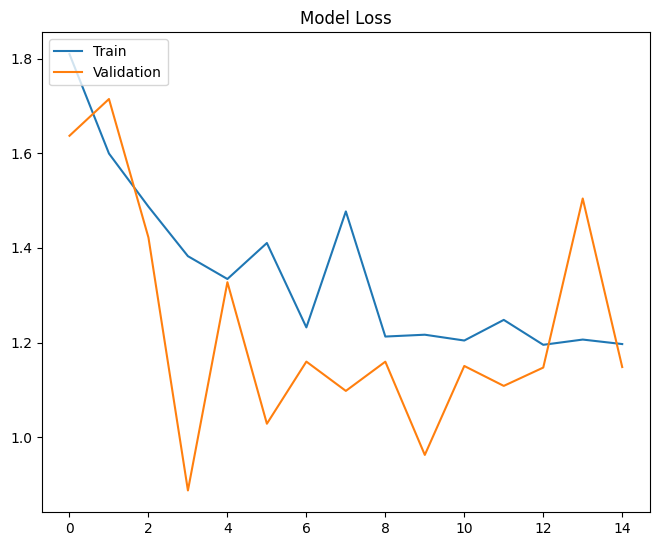

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)
#x-axis - epochs,y-axis -loss

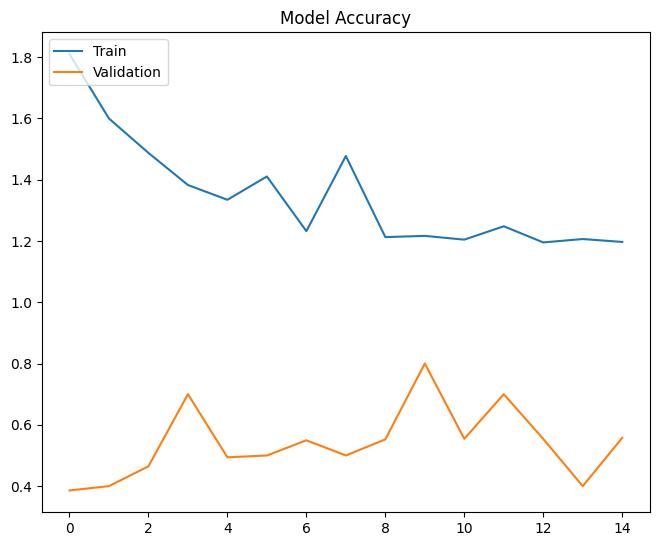

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)

# Saving Model

In [14]:
model_json=model.to_json() 
with open('model_a.json','w') as json_file:
    json_file.write(model_json)